### Machine Learning - CSCI 6505
#### Assignment 2
#### Submitted by: Aakash Patel - B00807065

In [194]:
import numpy as np
import matplotlib.pyplot as plt

[Circular Gaussian](https://stackoverflow.com/questions/52455356/how-can-i-make-ring-from-gaussian-distribution)
[Generating 2D gaussian](https://stackoverflow.com/questions/7687679/how-to-generate-2d-gaussian-with-python)


#### Q 1 a) Option 3 and Q1 b)

In [195]:
import pandas as pd
import math
import random

# Generate projections of the coordinates
def calc_projections(xy, n, noise):
    projection_list = []
    for z in xy:
        z = np.array(z)
        proj =(z / 10) +  (0.25*(n+1))*( z / np.linalg.norm(z))
        projection_list.append( proj )  
    
    if(noise==0):
        return projection_list
    else:
        count = math.floor(len(projection_list) * (0.1*noise))
        upd_projections=[]
    
        for i in range(len(projection_list)):
            if(count!=0):
                proj = projection_list[i]
                proj[0] = random.uniform(0, proj[0] )
                proj[1] = random.uniform(0, proj[1] )
                upd_projections.append(proj)
                count= count -1
                
            else:
                upd_projections.append(projection_list[i])
                
        return upd_projections

def generateData(numExamples, distributionShape, numClasses = 2, numOutputs=2, noise=0):
    
    if(numClasses!=numOutputs):
        if(not(numClasses==2 and numOutputs==1)):
            print("Number of Classes must be equal to number of outputs! Returning blank..!")
            return None
            
    dataset=None
    
    if distributionShape=="c":
        mean = [0, 0]
        cov = [[0.5,0],[0,0.5]]
        plt.figure(figsize=(10,10))
        perclassEx = math.ceil(numExamples/numClasses)
        all_data=[]
        for n in range(numClasses):
            x, y = np.random.multivariate_normal(mean, cov, perclassEx).T
            xy = zip(x, y)
            projections = calc_projections(xy, n, noise)
            all_data.append(np.vstack(projections))
            # Unzip information
            zx, zy = zip(*projections)
            plt.plot(zx, zy, 'o')
        
    elif distributionShape=="g":
        perclassEx = math.ceil(numExamples/numClasses)
        plt.figure(figsize=(10,10))
        randomness=0.6+noise
        all_data=[]
        if (numClasses==2):
            d1 = np.random.multivariate_normal([-2, -2], [[randomness, 0],[0, randomness]], perclassEx) 
            d2 = np.random.multivariate_normal([1, 1], [[randomness, 0],[0, randomness]], perclassEx)
            all_data.append(d1)
            all_data.append(d2)
        else:
            mean_coord = -2
            for i in range(numClasses):
                X = np.random.multivariate_normal([ mean_coord, mean_coord], [[randomness, 0],[0, randomness]], perclassEx)
                mean_coord+=3
                all_data.append(X)
        
        for i in range(len(all_data)):
            P=all_data[i]
            plt.plot(P[:, 0], P[:, 1], 'o')
    else:
        print("Only two distribution shapes allowed: 'circles', 'twoClusters'. Try again.")
        return None
       
    if(numClasses!=numOutputs):
        class_0 = np.zeros(perclassEx , dtype=int)
        class_1 = np.ones(perclassEx, dtype=int)
        d1 = np.insert(all_data[0], 2, class_0, axis=1)
        d2 = np.insert(all_data[1], 2, class_1, axis=1)
        dataset = np.concatenate((d1,d2), axis=0)
        return dataset
        
    else:    
        out_matrix_list=[]    
        for i in range(numOutputs):
            class_matrix = np.zeros((perclassEx,numOutputs), dtype=int)
            class_matrix[:,[i]]=class_matrix[:,[i]]+1
            out_matrix_list.append(class_matrix)
            
        final_y =out_matrix_list[0] 
        for i in range(len(out_matrix_list)):
            if i!=0:
                temp = np.concatenate((final_y, out_matrix_list[i]), axis=0)
                final_y =temp

        final_x =all_data[0]
        for i in range(len(all_data)):
            if i!=0:
                temp =np.concatenate((final_x, all_data[i]), axis=0) 
                final_x=temp
            
        dataset=np.concatenate((final_x,final_y), axis=1)        
        return dataset
        

#### Sample Output without Noise

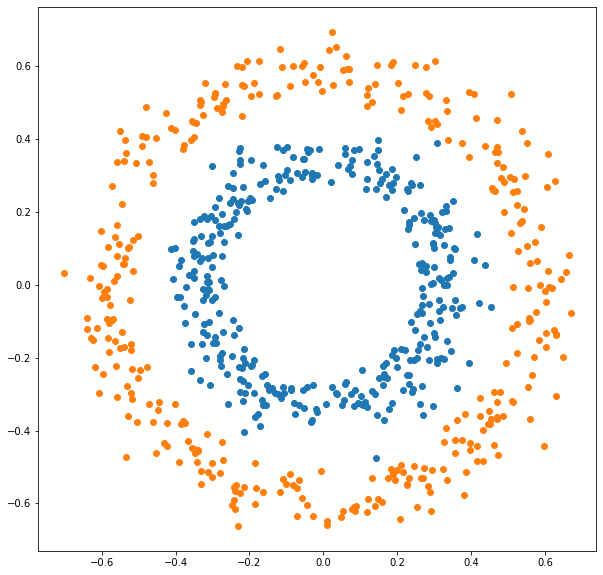

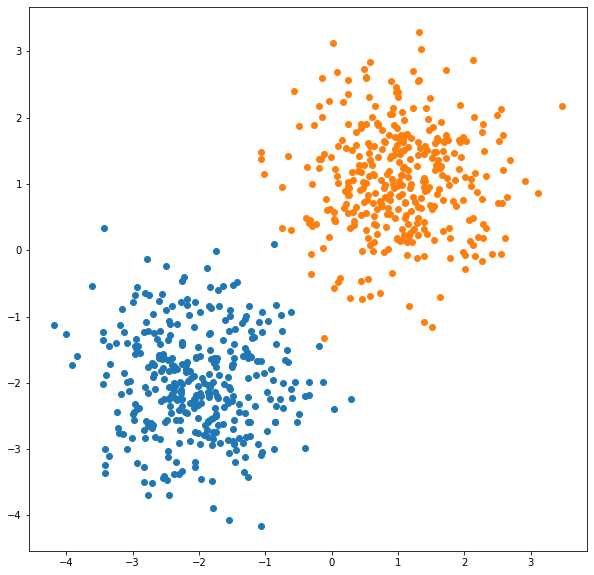

In [487]:
X = generateData(700, 'c',numClasses=2 , numOutputs=1, noise=0)
X = generateData(700, 'g',numClasses=2 , numOutputs=1, noise=0)

#### Sample Output with Noise

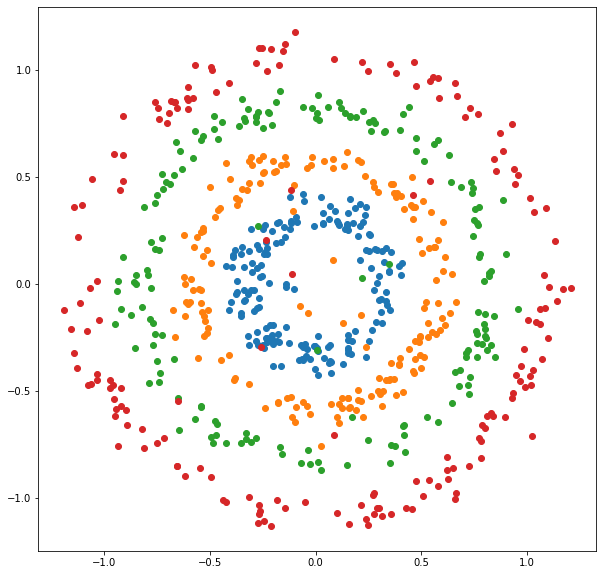

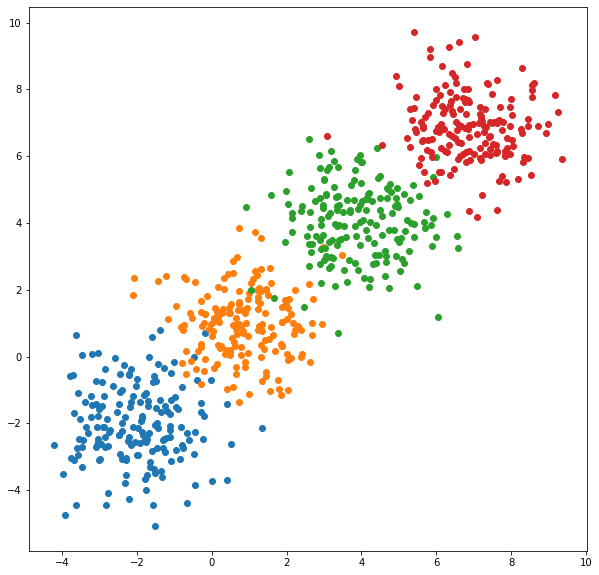

In [483]:
X = generateData(700, 'c',numClasses=4 , numOutputs=4, noise=0.5)
X = generateData(700, 'g',numClasses=4 , numOutputs=4, noise=0.5)

[Exponent Normalized Link](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)
[Implementing Softmax in Python](https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python)
[ML Cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

#### Functions for Neural Net

In [380]:
def sigmoid(x):
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)
    
def softmax(z):
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] # necessary step to do broadcasting
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] 
    return e_x / div

def cross_entropy(yHat, t):
    if t == 1:
      return -np.log(yHat)
    else:
      return -np.log(1 - yHat)
    
def apply_activation(activationType, p, q):
    if activationType=="linear" or activationType=="L":
        x= np.dot(p,q)
        return x
    
    elif activationType=="sigmoid" or activationType=="S":
        x= np.dot(p,q)
        vf=np.vectorize(sigmoid)
        ans=vf(x)
        return ans
    
    elif activationType=="reLU" or activationType=='R':
        x= np.dot(p,q)
        ans = np.maximum(x, 0)
        return ans
    
    elif activationType=="softmax":
        x=np.dot(p,q)
        ans = softmax(x)
        return ans

def find_derivative(activationType, val):
    derivative=None
    if activationType=="linear" or activationType=="L":
        derivative=1
    
    elif activationType=="sigmoid" or activationType=="S":
        derivative = val * (1-val)
    
    elif activationType=="reLU" or activationType=='R':
        return np.where(val <= 0, 0, 1)
    
    elif activationType=="softmax":
        derivative = e_x / e_x.sum()
    
    return derivative

#### Q 1 d) Feed Forward Neural Net

In [451]:
def train( X, numInput, numHiddenUnits, numOutput, activationType, numIter):
    
    X_input = X[:, :numInput]
    b = np.ones(len(X_input))
    X_input = np.insert(X_input, numInput, b, axis=1)
    t = X[:, numInput:]
    labelshape= t.shape
    
    if(labelshape[1]!=numOutput):
        print("Num of output doesn't match number of labels provided. ")
        return None,None
    
    W1 = 2*np.random.random((numInput+1,numHiddenUnits)) -1
    W2 = 2*np.random.random((numHiddenUnits, numOutput)) -1
    
    costs=[]
    accuracies=[]

    for j in range(numIter):
        
        h = apply_activation( activationType , X_input, W1)
        if numOutput==1:
            y = apply_activation("sigmoid", h, W2)        
        elif(numOutput>1):
            y = apply_activation("softmax", h, W2)
    
        if(numOutput==1):
            cost = np.sum((0.5)* np.square(np.subtract(y,t)), axis=0)
            costs.append(cost)
            y_pred = np.rint(y)
            correct=0
            for i in range(len(t)):
                if(t[i]==y_pred[i]):
                    correct+=1
            accuracy = (correct/len(t)) *100
            accuracies.append( accuracy )        
            if( j%100==0 ):
                print("Cost: ",cost, "Accuracy: ",accuracy)   
        

        y_delta = (t - y)* find_derivative(activationType, y)
        h_delta = np.dot(y_delta, W2.T) * find_derivative(activationType, h)
        alpha=1e-04
        W2 += alpha * np.dot(h.T, y_delta)
        W1 += alpha * np.dot(X_input.T, h_delta)
        
    return W1,W2   

#### Random Data Generation for arbitrary input

In [478]:
import random
all_data=[]
for i in range(1000):
    t=[]
    sum=0
    for j in range(3):
        x= random.randint(0, 100)
        sum+=x
        t.append(x)
    t.append(sum%2)
    all_data.append(t)
    

In [479]:
X1=np.array(all_data)
X1[:5]

array([[82, 58, 45,  1],
       [46, 43, 95,  0],
       [27, 91, 51,  1],
       [25, 47, 76,  0],
       [ 2, 70, 54,  0]])

In [481]:
W1,W2=train( X1, numInput=3, numHiddenUnits=5, numOutput=1, activationType="reLU", numIter=10000)

Cost:  [258.01280975] Accuracy:  47.5
Cost:  [124.83361482] Accuracy:  50.5
Cost:  [124.7978854] Accuracy:  50.3
Cost:  [124.75037471] Accuracy:  50.4
Cost:  [124.73293859] Accuracy:  50.4
Cost:  [124.72756327] Accuracy:  50.3
Cost:  [124.71730781] Accuracy:  50.4
Cost:  [124.7179746] Accuracy:  50.3
Cost:  [124.7170311] Accuracy:  50.3
Cost:  [124.71765156] Accuracy:  50.4
Cost:  [124.71688481] Accuracy:  50.4
Cost:  [124.71682302] Accuracy:  50.4
Cost:  [124.71665464] Accuracy:  50.7
Cost:  [124.71656535] Accuracy:  50.5
Cost:  [124.71664701] Accuracy:  50.5
Cost:  [124.71735024] Accuracy:  50.5
Cost:  [124.7169027] Accuracy:  50.7
Cost:  [124.71680719] Accuracy:  50.5
Cost:  [124.71588829] Accuracy:  50.5
Cost:  [124.7165173] Accuracy:  50.4
Cost:  [124.71654275] Accuracy:  50.3
Cost:  [124.7153025] Accuracy:  50.3
Cost:  [124.71537435] Accuracy:  50.4
Cost:  [124.71579447] Accuracy:  50.4
Cost:  [124.71562192] Accuracy:  50.3
Cost:  [124.71588215] Accuracy:  50.3
Cost:  [124.715082

In [345]:
W2

array([[-2.50972002],
       [ 0.2550181 ],
       [-0.44761005],
       [ 5.16341811]])

In [485]:
X

array([[-0.20648576, -1.78991206,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.39509942, -1.432535  ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.75953934, -4.0071029 ,  1.        ,  0.        ,  0.        ,
         0.        ],
       ...,
       [ 7.09059123,  4.17064029,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 8.05189328,  6.3005783 ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 5.88051727,  5.98285663,  0.        ,  0.        ,  0.        ,
         1.        ]])

#### Simple NN with arbitrary num. of hidden neurons and arbitrary activation

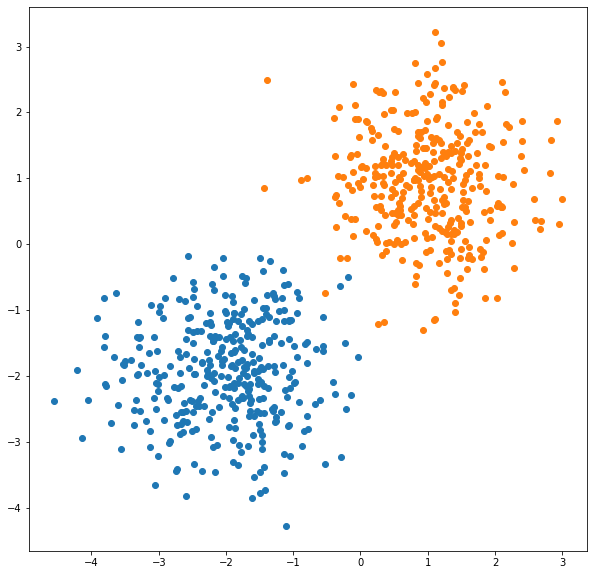

In [488]:
X = generateData(700, 'g',numClasses=2 , numOutputs=1, noise=0)

In [491]:
W1,W2=train( X, numInput=2, numHiddenUnits=5, numOutput=1, activationType="S", numIter=1000)

Cost:  [90.23419402] Accuracy:  50.0
Cost:  [81.46691611] Accuracy:  50.0
Cost:  [74.75953484] Accuracy:  53.42857142857142
Cost:  [67.22756357] Accuracy:  68.85714285714286
Cost:  [58.16409343] Accuracy:  85.14285714285714
Cost:  [48.14837029] Accuracy:  93.42857142857143
Cost:  [38.66444137] Accuracy:  97.42857142857143
Cost:  [30.8294549] Accuracy:  98.57142857142858
Cost:  [24.83457936] Accuracy:  98.85714285714286
Cost:  [20.36981741] Accuracy:  98.85714285714286


In [493]:
W1

array([[-0.51636796, -0.63749999,  0.33964333, -1.2224939 ,  0.45225649],
       [-0.83821329, -1.12046155,  1.03613927,  0.07694005, -0.33476741],
       [-0.62130827,  0.34475657,  0.87406246,  0.11995982,  0.78339299]])

In [494]:
W2

array([[-0.71366984],
       [-1.10666746],
       [ 1.55297014],
       [-0.57031657],
       [ 0.5781205 ]])

In [498]:
W1,W2=train( X, numInput=2, numHiddenUnits=5, numOutput=1, activationType="R", numIter=1000)

Cost:  [169.36888554] Accuracy:  19.428571428571427
Cost:  [2.74753559] Accuracy:  99.57142857142857
Cost:  [1.43513334] Accuracy:  99.57142857142857
Cost:  [1.13321589] Accuracy:  99.57142857142857
Cost:  [1.0093794] Accuracy:  99.71428571428571
Cost:  [0.94445432] Accuracy:  99.71428571428571
Cost:  [0.90567414] Accuracy:  99.71428571428571
Cost:  [0.88073341] Accuracy:  99.71428571428571
Cost:  [0.86380301] Accuracy:  99.71428571428571
Cost:  [0.85180578] Accuracy:  99.71428571428571


#### NN Predict Function

In [499]:
def predict(X_input, W1, W2, numInput=2, numHiddenUnits=5, numOutput=1, activationType="sigmoid", verbosity=0 ):
    if(verbosity==1):
        print("Caclulating h..")
    h = apply_activation(activationType, X_input, W1)
    y= apply_activation(activationType, h, W2)
    if(verbosity==1):
        print("Caclulating y..")
    return y

In [500]:
print(predict([0,0,1],W1,W2))  
print(predict([1.5,1.5,1],W1,W2))
print(predict([-2,-2,1],W1,W2))
print(predict([0.25,0.25,1],W1,W2))
print(predict([-3,-2,1],W1,W2))
print(predict([1.8,-0.25,1],W1,W2))

[0.81812956]
[0.95953977]
[0.21542398]
[0.87514358]
[0.15939763]
[0.93654606]


In [356]:
print(predict([0,0,1],W1,W2,activationType="reLU"))  
print(predict([1.5,1.5,1],W1,W2,activationType="reLU"))
print(predict([-2,-2,1],W1,W2,activationType="reLU"))
print(predict([0.25,0.25,1],W1,W2,activationType="reLU"))
print(predict([-3,-2,1],W1,W2,activationType="reLU"))
print(predict([1.8,-0.25,1],W1,W2,activationType="reLU"))

[5.10444936]
[13.94552037]
[0.]
[6.5779612]
[0.]
[8.4817395]


Here Points with class 0 accurately predicted with reLU activation.

### Q1 d)  Refactoring Model

In [582]:
def squared_error(y,t):
    ans = (0.5)* np.square(np.subtract(y, t))
    return ans

In [587]:
import sys
class Model:
    def __init__(self, numInputs=2, numOutputs=1, layerSize=4, numHiddenLayers=1, activationType='R'):
        
        #  numInputs: number of inputs to the net
        #  numOuputs: number of output units in the output
        #  layerSize: the number of units in each hidden layer
        #  activationType: either ’L’ (linear), ’S’ (sigmoid), ’R’(reLU)
        #  This is the activation type of all hidden layers.
        #  Note that the output should automatically be a softmax layer if
        #  numOutputs is greater than 1, and a sigmoid otherwise.
        #  (So the default output is a single sigmoid unit).

        self.numInputs = numInputs
        self.numOutputs = numOutputs
        self.layerSize = layerSize
        self.numHiddenLayers = numHiddenLayers
        self.activationType = activationType
        if(activationType!='R' and activationType!='S' and activationType!='L'):
            print("Invalid activation type!")
            print("Select among: R/S/L")
            sys.exit(1)
            
    
    def initWeights(self,mean,stdev):
        self.W1 = np.random.normal(mean, stdev, (self.numInputs+1, self.layerSize))
        self.W2 = np.random.normal(mean, stdev, (self.layerSize, self.numOutputs))

    def setInput(self,X):
        X_inputs = X[:, :self.numInputs]
        b = np.ones(len(X_inputs))
        X_inputs = np.insert(X_inputs, self.numInputs, b, axis=1)
        t = X[:, self.numInputs:]
        labelshape= t.shape
        
        if(labelshape[1]!=self.numOutputs):
            print("Num of output doesn't match number of labels provided. Retry.")
            sys.exit(1)
            
        self.X_inputs = X_inputs
        self.t = t
        
    def setTest(self,X):
        X_test = X[:, :self.numInputs]
        b = np.ones(len(X_test))
        X_test = np.insert(X_test, self.numInputs, b, axis=1)
        t_test = X[:, self.numInputs:]
        labelshape= t_test.shape
        
        if(labelshape[1]!=self.numOutputs):
            print("Num of output doesn't match number of labels provided for Test data. Retry.")
            sys.exit(1)    
        self.X_test = X_test
        self.t_test = t_test
        
    def train(self,iterations, stepsize=1e-04):
            
        costs=[]
        accuracies=[]
        for j in range(iterations):
            h = apply_activation( self.activationType , self.X_inputs, self.W1)
            if self.numOutputs==1:
                y = apply_activation("sigmoid", h, self.W2)        
            elif(self.numOutputs>1):
                y = apply_activation("softmax", h, self.W2)
            error_list = []
            if(self.numOutputs==1):
                train_err = np.sum((0.5)* np.square(np.subtract(y, self.t)), axis=0)
                error_list.append(train_err)
                y_pred = np.rint(y)
                correct=0
                for i in range(len(self.t)):
                    if(self.t[i]==y_pred[i]):
                        correct+=1
                        
                accuracy = (correct/len(self.t)) *100
                accuracies.append( accuracy )        
                if( j%100==0 ):
                    print("Cost: ",train_err, "Accuracy: ",accuracy)
                test_err = self._getTestError()
                error_list.append(np.array(error_list))
            
            costs.append(error_list)
            y_delta = (self.t - y) * find_derivative( self.activationType, y)
            h_delta = np.dot(y_delta, self.W2.T) * find_derivative( self.activationType, h)
            self.W2 += stepsize * np.dot( h.T, y_delta )
            self.W1 += stepsize * np.dot( self.X_inputs.T, h_delta )
              
        return costs
   
    def _getTestError(self):
        h = apply_activation( self.activationType , self.X_test, self.W1)
        y = apply_activation("sigmoid", h, self.W2)
        test_err = np.sum((0.5)* np.square(np.subtract(y, self.t_test)), axis=0)
        return test_err

    def test(self):
        # return the error on the test set
        y= self.predict(self.X_test)        
        sqf = np.vectorize(squared_error)
        test_err = sqf(y, self.t_test)
        print("test",self.t_test)
        print("y",y)
        return test_err
    
    def predict(self, X1):
        # return the array of predictions for X1
        h = apply_activation(self.activationType, X1, self.W1)
        y= apply_activation(self.activationType, h, self.W2)
        return y
    

Cost:  [12.49872212] Accuracy:  85.0
test [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]
y [[10.4528038 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [12.65134221]
 [14.73862064]
 [ 0.        ]
 [12.91659587]]
Predictions:
 [[3.46262271]
 [8.70701816]
 [0.        ]]


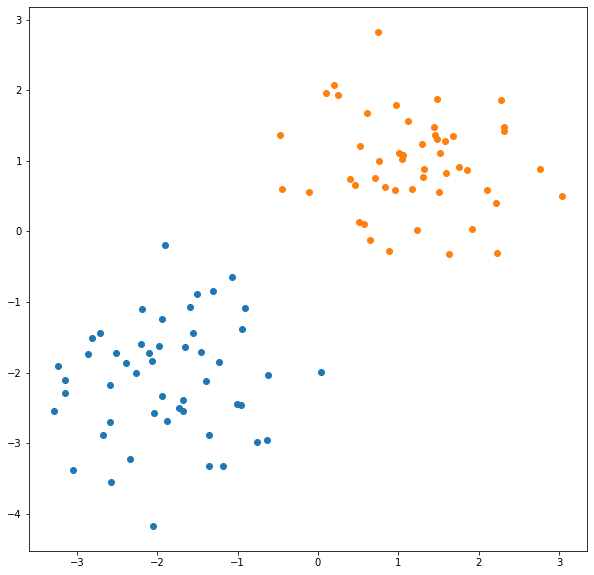

In [592]:
X= generateData( 100, 'g', 2, 1 ) # use 2 gaussians to generate
# 100 data points, with a single target value (0 or 1)
np.random.shuffle(X) # make sure the examples are shuffled
X_train = X[:90] # create a 90/10 train/test split
X_test = X[90:]
net = Model(numInputs=2, numOutputs=1, layerSize=5, numHiddenLayers=2, activationType='R')
net.setInput(X)
net.setTest(X_test)
net.initWeights(0.0,0.01) # initialize weights with mean 0 and standard deviation 0.01
trainError = net.train(100,0.1) # train for 100 iterations with a step size of 0.1, this
# should return 100x2 array containing the training and test error at each of the 100
# iterations
testError = net.test() # return the error on the test set
Y = net.predict(np.array([[0,0,1],[1,0,1],[-1,0,1]]))   #Note 1 is the bias
print("Predictions:\n",Y)

In [593]:
print(trainError[:10])

[[array([12.49872212]), array([[12.49872212]])], [array([12.41789668]), array([[12.41789668]])], [array([8.10914779]), array([[8.10914779]])], [array([0.55043169]), array([[0.55043169]])], [array([0.00556696]), array([[0.00556696]])], [array([0.00346181]), array([[0.00346181]])], [array([0.00233597]), array([[0.00233597]])], [array([0.00167016]), array([[0.00167016]])], [array([0.0012467]), array([[0.0012467]])], [array([0.00096212]), array([[0.00096212]])]]


In [594]:
testError # Error is zero where the prediction matches y_test

array([[44.67774985],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [67.8768877 ],
       [94.37484855],
       [ 0.        ],
       [71.00262857]])

#### Q 1 e) Allow variable hidden units

Cost:  [12.50344181] Accuracy:  50.0
test [[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]
y [[27.73381141]
 [10.52289686]
 [ 4.82105963]
 [ 0.        ]
 [ 0.        ]
 [27.04720566]
 [11.72799367]
 [29.90203458]
 [23.90891288]
 [ 0.        ]]
Predictions:
 [[10.24935564]
 [13.08609765]
 [ 4.14058874]]


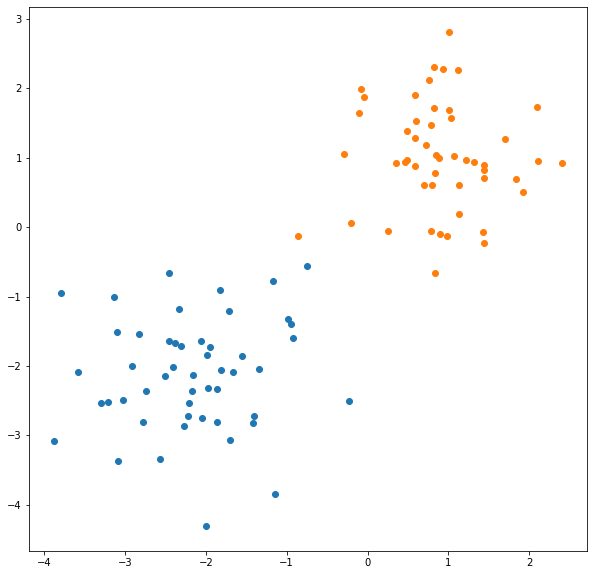

In [597]:
net = Model(numInputs=2, numOutputs=1, layerSize=5, numHiddenLayers=2, activationType='R')
#same as above but with 5 hidden units per layer

X= generateData( 100, 'g', 2, 1 ) # use 2 gaussians to generate
# 100 data points, with a single target value (0 or 1)

np.random.shuffle(X) # make sure the examples are shuffled
X_train = X[:90] # create a 90/10 train/test split
X_test = X[90:]

net.setInput(X)
net.setTest(X_test)
net.initWeights(0.0,0.01)

trainError = net.train(100,0.1) 
testError = net.test() # return the error on the test set
Y = net.predict(np.array([0,0,1])) 
Y = net.predict(np.array([[0,0,1],[1,0,1],[-1,0,1]]))   #Note 1 is the bias
print("Predictions:\n",Y)

In [598]:
print(trainError[:10])

[[array([12.50344181]), array([[12.50344181]])], [array([12.56820675]), array([[12.56820675]])], [array([12.53967473]), array([[12.53967473]])], [array([2.24612395]), array([[2.24612395]])], [array([0.51115374]), array([[0.51115374]])], [array([0.39572718]), array([[0.39572718]])], [array([0.08998645]), array([[0.08998645]])], [array([0.0421325]), array([[0.0421325]])], [array([0.03932283]), array([[0.03932283]])], [array([0.03731256]), array([[0.03731256]])]]


In [599]:
testError

array([[357.34833623],
       [ 45.34278232],
       [  7.30024834],
       [  0.        ],
       [  0.        ],
       [339.22846139],
       [ 57.54492405],
       [417.66380143],
       [262.40914473],
       [  0.        ]])

#### Q 1 f) Allow all possible activation types

Cost:  [12.49958604] Accuracy:  50.0
test [[0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]]
y [[0.03730942]
 [0.11469052]
 [0.98044113]
 [0.03693631]
 [0.94541637]
 [0.9738551 ]
 [0.06247923]
 [0.04250567]
 [0.97971491]
 [0.98081351]]
Predictions:
 [[0.88012194]
 [0.96997216]
 [0.30354986]]


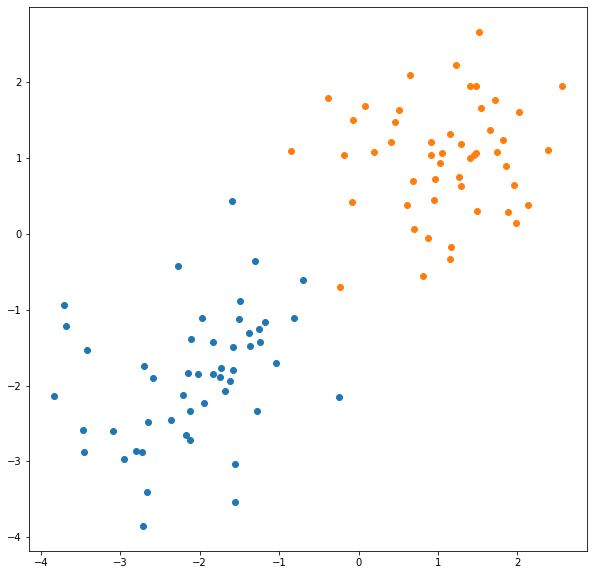

In [601]:
net = Model(numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=2, activationType='S')
#same as above but with sigmoid hidden units

X= generateData( 100, 'g', 2, 1 ) # use 2 gaussians to generate
# 100 data points, with a single target value (0 or 1)

np.random.shuffle(X) # make sure the examples are shuffled
X_train = X[:90] # create a 90/10 train/test split
X_test = X[90:]

net.setInput(X)
net.setTest(X_test)
net.initWeights(0.0,0.01)

trainError = net.train(100,0.1) 
testError = net.test() # return the error on the test set
Y = net.predict(np.array([0,0,1])) 
Y = net.predict(np.array([[0,0,1],[1,0,1],[-1,0,1]]))   #Note 1 is the bias
print("Predictions:\n",Y)

In [602]:
print(trainError[:10])

[[array([12.49958604]), array([[12.49958604]])], [array([12.49746628]), array([[12.49746628]])], [array([12.49362512]), array([[12.49362512]])], [array([12.48397154]), array([[12.48397154]])], [array([12.45953179]), array([[12.45953179]])], [array([12.39806239]), array([[12.39806239]])], [array([12.24799069]), array([[12.24799069]])], [array([11.9093671]), array([[11.9093671]])], [array([11.25642292]), array([[11.25642292]])], [array([10.24928468]), array([[10.24928468]])]]


In [603]:
testError

array([[0.000696  ],
       [0.00657696],
       [0.00019127],
       [0.00068215],
       [0.00148969],
       [0.00034178],
       [0.00195183],
       [0.00090337],
       [0.00020574],
       [0.00018406]])

#### Q1 g) Allow multiple output units

#### REWRITING / UPDATING MODEL FOR REMAINING PORTIONS

In [ ]:
def perClassEntropy(p,d):
    np.divide

In [609]:
class Model:
    def __init__(self, numInputs=2, numOutputs=1, layerSize=4, numHiddenLayers=1, activationType='R'):
        
        #  numInputs: number of inputs to the net
        #  numOuputs: number of output units in the output
        #  layerSize: the number of units in each hidden layer
        #  activationType: either ’L’ (linear), ’S’ (sigmoid), ’R’(reLU)
        #  This is the activation type of all hidden layers.
        #  Note that the output should automatically be a softmax layer if
        #  numOutputs is greater than 1, and a sigmoid otherwise.
        #  (So the default output is a single sigmoid unit).

        self.numInputs = numInputs
        self.numOutputs = numOutputs
        self.layerSize = layerSize
        self.numHiddenLayers = numHiddenLayers
        self.activationType = activationType
        if(activationType!='R' and activationType!='S' and activationType!='L'):
            print("Invalid activation type!")
            print("Select among: R/S/L")
            sys.exit(1)
            
    
    def initWeights(self,mean,stdev):
        self.W1 = np.random.normal(mean, stdev, (self.numInputs+1, self.layerSize))
        self.W2 = np.random.normal(mean, stdev, (self.layerSize, self.numOutputs))

    def setInput(self,X):
        X_inputs = X[:, :self.numInputs]
        b = np.ones(len(X_inputs))
        X_inputs = np.insert(X_inputs, self.numInputs, b, axis=1)
        t = X[:, self.numInputs:]
        labelshape= t.shape
        
        if(labelshape[1]!=self.numOutputs):
            print("Num of output doesn't match number of labels provided. Retry.")
            sys.exit(1)
            
        self.X_inputs = X_inputs
        self.t = t
        
    def setTest(self,X):
        X_test = X[:, :self.numInputs]
        b = np.ones(len(X_test))
        X_test = np.insert(X_test, self.numInputs, b, axis=1)
        t_test = X[:, self.numInputs:]
        labelshape= t_test.shape
        
        if(labelshape[1]!=self.numOutputs):
            print("Num of output doesn't match number of labels provided for Test data. Retry.")
            sys.exit(1)    
        self.X_test = X_test
        self.t_test = t_test
        
    def train(self,iterations, stepsize=1e-04):
            
        costs=[]
        accuracies=[]
        for j in range(iterations):
            h = apply_activation( self.activationType , self.X_inputs, self.W1)
            if self.numOutputs==1:
                y = apply_activation("sigmoid", h, self.W2)        
            elif(self.numOutputs>1):
                y = apply_activation("softmax", h, self.W2)
            
            error_list = []
            if(self.numOutputs==1):
                train_err = np.sum((0.5)* np.square(np.subtract(y, self.t)), axis=0)
                error_list.append(train_err)
                y_pred = np.rint(y)
                correct=0
                for i in range(len(self.t)):
                    if(self.t[i]==y_pred[i]):
                        correct+=1
                        
                accuracy = (correct/len(self.t)) *100
                accuracies.append( accuracy )        
                if( j%100==0 ):
                    print("Cost: ",train_err, "Accuracy: ",accuracy)
                test_err = self._getTestError()
                error_list.append(np.array(error_list))
            else:
                #Cross Entropy error
                cee=np.vectorize(cross_entropy)
                error_matrix = cee(y,self.t)
                error_per_class = np.sum(error_matrix, axis=1)
                final_matrix= error_matrix/error_per_class[:,None]
                error_list.append(final_matrix.sum(axis=1))
            
            costs.append(error_list)
            y_delta = (self.t - y) * find_derivative( self.activationType, y)
            h_delta = np.dot(y_delta, self.W2.T) * find_derivative( self.activationType, h)
            self.W2 += stepsize * np.dot( h.T, y_delta )
            self.W1 += stepsize * np.dot( self.X_inputs.T, h_delta )
              
        return costs
   
    def _getTestError(self):
        h = apply_activation( self.activationType , self.X_test, self.W1)
        y = apply_activation("sigmoid", h, self.W2)
        test_err = np.sum((0.5)* np.square(np.subtract(y, self.t_test)), axis=0)
        return test_err

    def test(self):
        # return the error on the test set
        y= self.predict(self.X_test)        
        sqf = np.vectorize(squared_error)
        test_err = sqf(y, self.t_test)
        print("test",self.t_test)
        print("y",y)
        return test_err
    
    def predict(self, X1):
        # return the array of predictions for X1
        h = apply_activation(self.activationType, X1, self.W1)
        y= apply_activation(self.activationType, h, self.W2)
        return y
    

test [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
y [[0.9905387  0.90971493 0.01610135]
 [0.04142829 0.90286052 0.99152907]
 [0.54173234 0.97831332 0.85856878]
 [0.04379552 0.90528557 0.99108295]
 [0.61101559 0.98104583 0.82493434]
 [0.84570413 0.98373362 0.55021305]
 [0.99019133 0.9114638  0.01696145]
 [0.99110045 0.90643985 0.01471789]
 [0.04247736 0.90395788 0.99133124]
 [0.99096228 0.90699298 0.01502871]
 [0.76858473 0.98465983 0.6912589 ]
 [0.99101216 0.90687293 0.01492346]]
Predictions:
 [[0.91070423 0.97854825 0.34146607]
 [0.81151818 0.98582172 0.63432988]
 [0.97774118 0.94638722 0.05598573]]


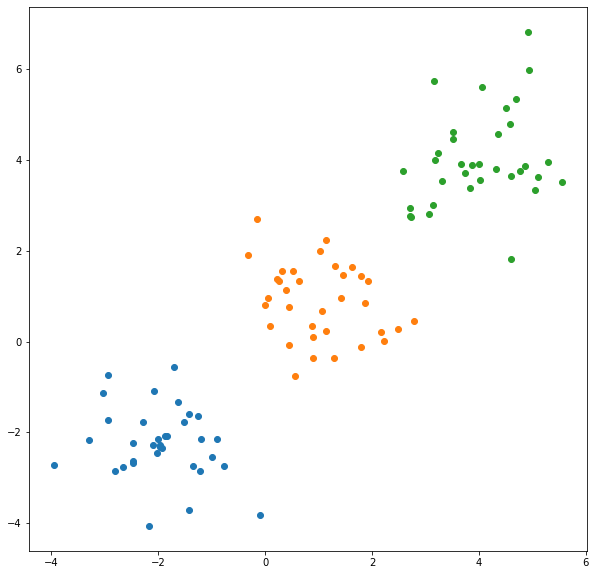

In [610]:
net = Model(numInputs=2, numOutputs=3, layerSize=2, numHiddenLayers=2, activationType='S')
#3 softmax output units
X = generateData(100, 'g',numClasses=3 , numOutputs=3, noise=0)
# use 2 gaussians to generate
# 100 data points, with a single target value (0 or 1)

np.random.shuffle(X) # make sure the examples are shuffled
X_train = X[:90] # create a 90/10 train/test split
X_test = X[90:]

net.setInput(X)
net.setTest(X_test)
net.initWeights(0.0,0.01)

trainError = net.train(100,0.1) 
testError = net.test() # return the error on the test set
Y = net.predict(np.array([0,0,1])) 
Y = net.predict(np.array([[0,0,1],[1,0,1],[-1,0,1]]))   #Note 1 is the bias
print("Predictions:\n",Y)

In [612]:
print(trainError[:3])

[[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])], [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])], [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 

In [613]:
testError

array([[4.47580842e-05, 4.13790629e-01, 1.29626771e-04],
       [8.58151426e-04, 4.07578555e-01, 3.58783493e-05],
       [1.46736967e-01, 2.35156038e-04, 3.68570178e-01],
       [9.59023963e-04, 4.09770985e-01, 3.97568567e-05],
       [1.86670028e-01, 1.79630235e-04, 3.40258333e-01],
       [3.57607736e-01, 1.32297585e-04, 1.51367203e-01],
       [4.81050422e-05, 4.15383125e-01, 1.43845427e-04],
       [3.96009883e-05, 4.10816602e-01, 1.08308099e-04],
       [9.02163098e-04, 4.08569929e-01, 3.75736859e-05],
       [4.08401562e-05, 4.11318130e-01, 1.12931088e-04],
       [2.95361240e-01, 1.17660392e-04, 2.38919435e-01],
       [4.03906486e-05, 4.11209254e-01, 1.11354769e-04]])